In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
#from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import datetime

train = pd.read_csv('C:/Users/Yunfei Cai/Desktop/Porsche data.csv')
#初始設定----------------------------------------------------------------------

C:\Users\Yunfei Cai\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train=train.drop(["Vin"],axis=1)

train_y= train["Price"]
train_x= train.drop(["Price"],axis=1)


train_x=pd.get_dummies(train_x)


test_x=train_x.sample(n=500,random_state=0)
train=train_x.drop(train_x.sample(n=500,random_state=0).index,axis=0)

test_y=train_y.sample(n=500,random_state=0)
train=train_y.drop(train_y.sample(n=500,random_state=0).index,axis=0)


train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.3)

#training set
train_x=train_x.values
train_y=train_y.values
train_y=train_y.reshape(-1,1)
val_x=val_x.values
val_y=val_y.values
val_y=val_y.reshape(-1,1)
test_x=test_x.values
test_y=test_y.values
test_y=test_y.reshape(-1,1)



#標準化
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)
 


#PCA---------------------------------------------------------------------------

pca_num=0
delta=0.1

pca=PCA(n_components = 0.999)
train_x=pca.fit_transform(train_x)
val_x=pca.transform(val_x)
test_x=pca.transform(test_x)
dimention=train_x.shape[1]


16900.53634673457
17475.55060968622
11629.178247692551
12527.227451784798
15233.221949963308
cross—validation mean rmse= 14753.14292117229
finish, plot the scatter figure


<Figure size 432x288 with 0 Axes>

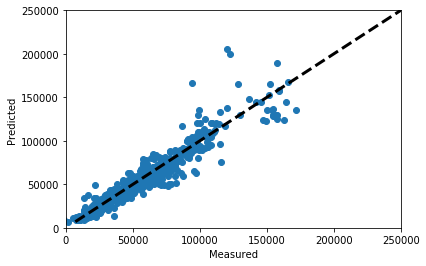

In [3]:
starttime = datetime.datetime.now()
#kernel
#for a in np.arange(1,4):
    #degree=a
    #i=0
    #train_x1=train_x
    #test_x1=test_x
    #train_x_copy=train_x
    #test_x_copy=test_x
    #for power in range(2,degree+1):
        #i=i+1
        #train_x1=np.concatenate((train_x, np.power(train_x_copy,power)),axis=1) 
        #test_x1=np.concatenate((test_x, np.power(test_x_copy,power)),axis=1) 

    # for n in np.arange(2,10):
    
#ridge regression
from sklearn.linear_model import RidgeCV
RR = RidgeCV(alphas=np.logspace(-5, 5, 100))
K=5
kf = KFold(n_splits=K)

i=0
rmse=0

rmse_his=[]
for train_index, val_index in kf.split(train_x):
    RR.fit(train_x[train_index],train_y[train_index])
    y_RR = RR.predict(train_x[val_index])


    mse=np. mean(( y_RR - train_y[val_index]) ** 2)
    rmse=np.sqrt(mse)
    rmse_his=np.append(rmse_his, rmse)
    print(rmse) 

print("cross—validation mean rmse=",np.mean(rmse_his))
endtime = datetime.datetime.now()
print ("the processing time is :",(endtime - starttime).seconds,"seconds")
print('alpha：',RR.alpha_)

print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_RR,  train_y[val_index])

ax.plot([train_y[val_index].min(), train_y[val_index].max()], [train_y[val_index].min(), train_y[val_index].max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.xlim((0,250000))
plt.ylim((0,250000))

plt.show()   
plt.pause(0.1)

testing set rmse= 10671.160937206829
the processing time is : 5 seconds
alpha： 148.49682622544634
finish, plot the scatter figure


<Figure size 432x288 with 0 Axes>

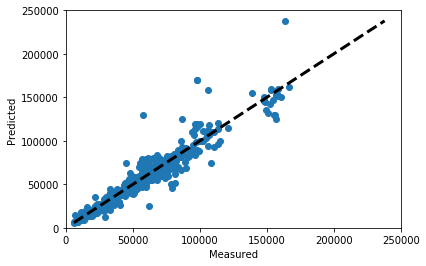

In [4]:
starttime = datetime.datetime.now()
RR.fit(train_x,train_y)
y_RR0 = RR.predict (test_x)
mse0=np. mean(( y_RR0 - test_y) ** 2)
rmse0= np.sqrt(mse0)
print("testing set rmse=",rmse0)
endtime = datetime.datetime.now()
print ("the processing time is :",(endtime - starttime).seconds,"seconds")
print('alpha：',RR.alpha_)

print("finish, plot the scatter figure")
plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(y_RR0,  test_y)

ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.xlim((0,250000))
plt.ylim((0,250000))

plt.show()   
plt.pause(0.1)